In [19]:
import pandas as pd
import os
import logging 
import matplotlib.pyplot as plt

In [20]:

# Set up logging
logging.basicConfig(
    filename="datasets.log",  # Log file name
    level=logging.INFO,       # Log level
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Define the directory containing your datasets
data = r"C:\Users\Hasan\Desktop\week4"

# File names
files = ["store.csv", "test.csv", "train.csv"]

# Read and log datasets
for file in files:
    try:
        file_path = os.path.join(data, file)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Log the file name and its contents (first few rows)
        logging.info(f"Contents of {file}:\n{df.head().to_string(index=False)}")
        print(f"{file} processed and logged successfully.")
        # Print the file's head to the console
        print(f"\nContents of {file}:")
        print(df.head())
    except Exception as e:
        # Log any errors that occur during processing
        logging.error(f"Error processing {file}: {e}")
        print(f"Error processing {file}. Check log for details.")
         



store.csv processed and logged successfully.

Contents of store.csv:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12856\2789875488.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Read the CSV file


In [24]:
# Define the file path
data = r"C:\Users\Hasan\Desktop\week4"
store_file = os.path.join(data, "store.csv")

try:
    # Load the dataset
    store_df = pd.read_csv(store_file)

    # Check for missing values before filling
    print("Missing values before filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Fill missing values
    store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mean())  # Fill with mean
    store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mean())  # Fill with mean
    store_df['PromoInterval'] = store_df['PromoInterval'].fillna(store_df['PromoInterval'].mode()[0])  # Fill with mode

    # Check for missing values after filling
    print("\nMissing values after filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Save the cleaned dataset (optional)
    cleaned_file = os.path.join(data, "store_cleaned.csv")
    store_df.to_csv(cleaned_file, index=False)
    print(f"Cleaned data saved to {cleaned_file}")
except Exception as e:
    print(f"Error processing store.csv: {e}")


Missing values before filling:
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64

Missing values after filling:
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64
Cleaned data saved to C:\Users\Hasan\Desktop\week4\store_cleaned.csv


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12856\2009736665.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file)



Promotion distribution in train.csv (%):
Promo
0    61.848548
1    38.151452
Name: proportion, dtype: float64

Promotion distribution in test.csv (%):
Promo
0    60.416667
1    39.583333
Name: proportion, dtype: float64


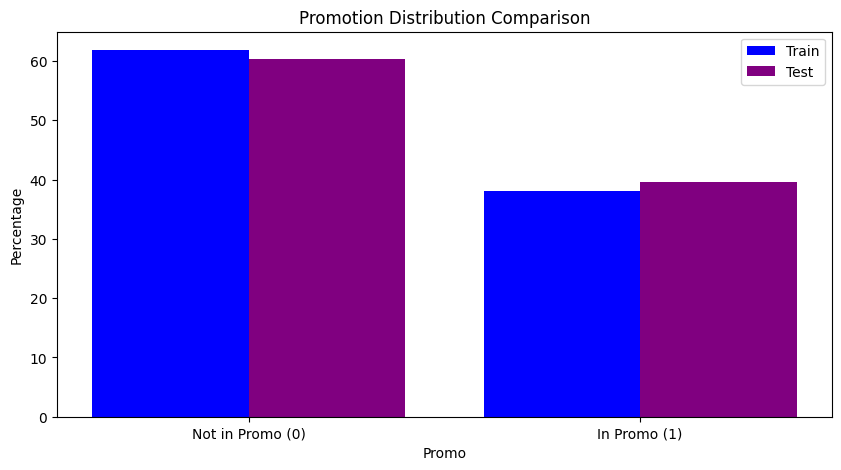

In [29]:

# Set up logging
logging.basicConfig(
    filename="promo_comparison.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# File paths
data = r"C:\Users\Hasan\Desktop\week4"
train_file = os.path.join(data, "train.csv")
test_file = os.path.join(data, "test.csv")

try:
    # Load datasets
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    # Check if 'Promo' column exists in both datasets
    if 'Promo' in train_df.columns and 'Promo' in test_df.columns:
        # Calculate the distribution of 'Promo' for train and test datasets
        train_promo_dist = train_df['Promo'].value_counts(normalize=True) * 100
        test_promo_dist = test_df['Promo'].value_counts(normalize=True) * 100

        # Log the distributions
        logging.info("Promotion distribution in train.csv:\n" + train_promo_dist.to_string())
        logging.info("Promotion distribution in test.csv:\n" + test_promo_dist.to_string())

        # Print the distributions to the console
        print("\nPromotion distribution in train.csv (%):")
        print(train_promo_dist)

        print("\nPromotion distribution in test.csv (%):")
        print(test_promo_dist)

        # Compare the distributions visually
        plt.figure(figsize=(10, 5))
        plt.bar(train_promo_dist.index - 0.2, train_promo_dist.values, width=0.4, label='Train', color='blue')
        plt.bar(test_promo_dist.index + 0.2, test_promo_dist.values, width=0.4, label='Test', color='purple')
        plt.title("Promotion Distribution Comparison")
        plt.xlabel("Promo")
        plt.ylabel("Percentage")
        plt.xticks([0, 1], labels=["Not in Promo (0)", "In Promo (1)"])
        plt.legend()
        plt.show()
    else:
        if 'Promo' not in train_df.columns:
            logging.warning("'Promo' column not found in train.csv.")
            print("'Promo' column not found in train.csv.")
        if 'Promo' not in test_df.columns:
            logging.warning("'Promo' column not found in test.csv.")
            print("'Promo' column not found in test.csv.")
except Exception as e:
    logging.error(f"Error comparing Promo distribution: {e}")
    print(f"Error comparing Promo distribution. Check log for details.")


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12856\966578002.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file)



Sales Analysis by Period:
  SalesPeriod         mean         sum
0       After  7710.153089   273980290
1      Before  7092.436843   271931121
2      During   258.159581     8015855
3     Regular  5830.705337  5319253357


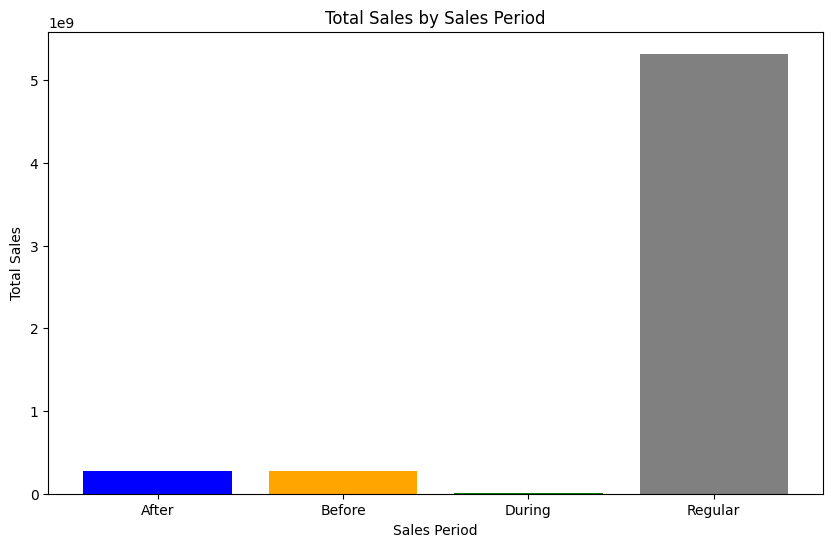

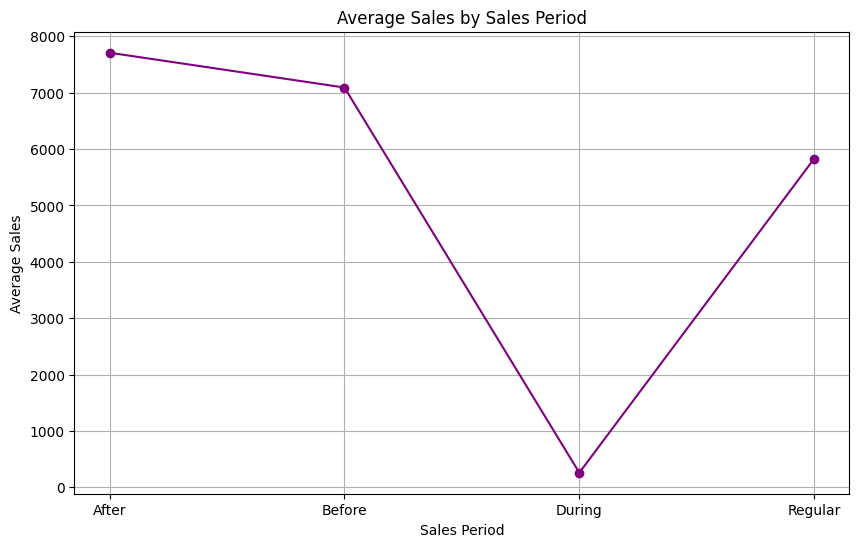

In [31]:

# Set up logging
logging.basicConfig(
    filename="sales_behavior.log",  # Log file name
    level=logging.INFO,             # Log level
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# File path for train.csv
data = r"C:\Users\Hasan\Desktop\week4"
train_file = os.path.join(data, "train.csv")

try:
    # Load the dataset
    logging.info("Loading train.csv...")
    df = pd.read_csv(train_file)
    logging.info(f"train.csv loaded successfully. Shape: {df.shape}")

    # Convert 'Date' to datetime format for easier time-based calculations
    logging.info("Converting 'Date' column to datetime format...")
    df['Date'] = pd.to_datetime(df['Date'])

    # Ensure 'StateHoliday' is treated as a string for clarity
    logging.info("Ensuring 'StateHoliday' is treated as a string...")
    df['StateHoliday'] = df['StateHoliday'].astype(str)

    # Sort data by Store and Date for logical grouping
    logging.info("Sorting data by Store and Date...")
    df = df.sort_values(by=['Store', 'Date']).reset_index(drop=True)

    # Define a function to label sales as "Before", "During", or "After" holidays
    def label_holiday_period(row, holidays):
        if row['StateHoliday'] != '0':
            return 'During'
        elif (row['Date'] - pd.Timedelta(days=7)) in holidays.values:
            return 'Before'
        elif (row['Date'] + pd.Timedelta(days=7)) in holidays.values:
            return 'After'
        else:
            return 'Regular'

    # Identify unique holiday dates
    logging.info("Identifying unique holiday dates...")
    holiday_dates = df[df['StateHoliday'] != '0']['Date']

    # Add a new column to categorize sales periods
    logging.info("Categorizing sales periods into 'Before', 'During', and 'After'...")
    df['SalesPeriod'] = df.apply(lambda x: label_holiday_period(x, holiday_dates), axis=1)

    # Group by SalesPeriod and calculate average and total sales
    logging.info("Calculating sales statistics for each sales period...")
    sales_analysis = df.groupby('SalesPeriod')['Sales'].agg(['mean', 'sum']).reset_index()
    logging.info("Sales analysis completed.")
    logging.info(f"\n{sales_analysis}")

    # Print sales analysis to the console
    print("\nSales Analysis by Period:")
    print(sales_analysis)

    # Visualize sales behavior across periods
    logging.info("Visualizing total sales by sales period...")
    plt.figure(figsize=(10, 6))
    plt.bar(sales_analysis['SalesPeriod'], sales_analysis['sum'], color=['blue', 'orange', 'green', 'gray'])
    plt.title("Total Sales by Sales Period")
    plt.xlabel("Sales Period")
    plt.ylabel("Total Sales")
    plt.savefig("total_sales_by_period.png")  # Save the plot as a file
    plt.show()
    logging.info("Total sales bar chart saved as 'total_sales_by_period.png'.")

    logging.info("Visualizing average sales by sales period...")
    plt.figure(figsize=(10, 6))
    plt.plot(sales_analysis['SalesPeriod'], sales_analysis['mean'], marker='o', color='purple')
    plt.title("Average Sales by Sales Period")
    plt.xlabel("Sales Period")
    plt.ylabel("Average Sales")
    plt.grid()
    plt.savefig("average_sales_by_period.png")  # Save the plot as a file
    plt.show()
    logging.info("Average sales line plot saved as 'average_sales_by_period.png'.")

except Exception as e:
    logging.error(f"An error occurred: {e}")
    print(f"An error occurred. Check the log file for details.")


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12856\570655187.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file)


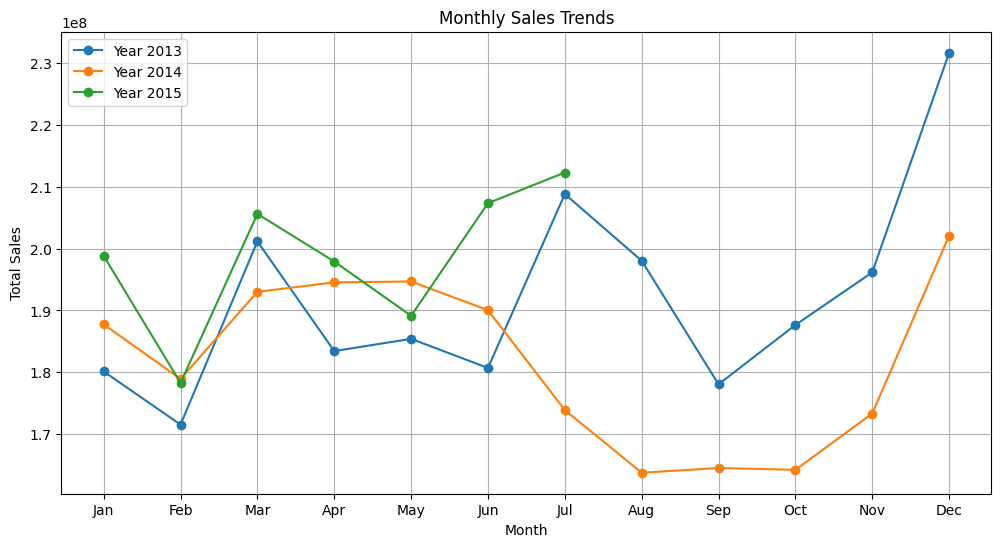

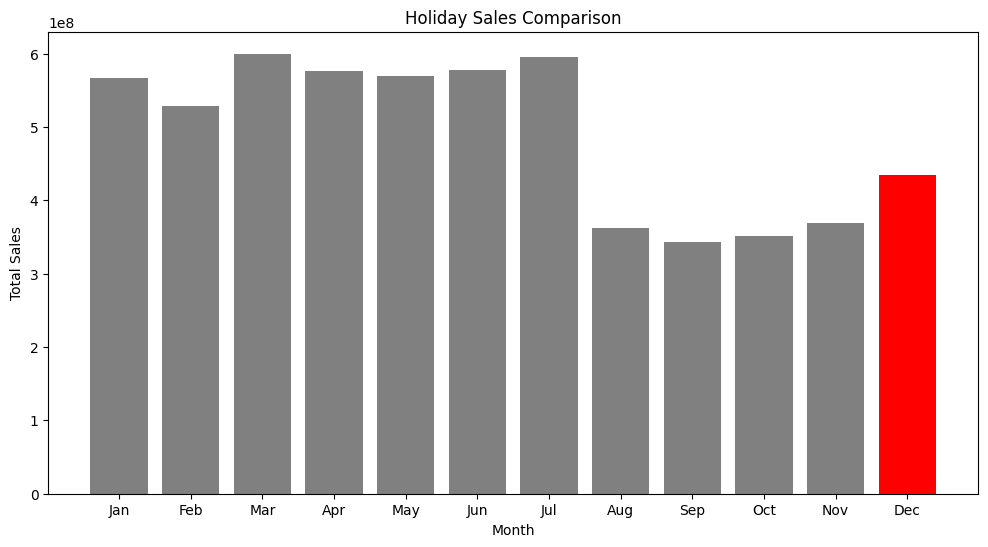

In [32]:

# Set up logging
logging.basicConfig(
    filename="seasonal_behavior.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# File path for train.csv
data = r"C:\Users\Hasan\Desktop\week4"
train_file = os.path.join(data, "train.csv")

try:
    # Load the dataset
    logging.info("Loading train.csv...")
    df = pd.read_csv(train_file)
    logging.info(f"train.csv loaded successfully. Shape: {df.shape}")

    # Preprocess the data
    logging.info("Preprocessing data...")
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
    df['Month'] = df['Date'].dt.month       # Extract month
    df['Year'] = df['Date'].dt.year         # Extract year

    # Define holiday flags
    logging.info("Defining seasonal flags...")
    df['Christmas'] = df['Month'].apply(lambda x: 1 if x == 12 else 0)  # Christmas in December
    df['Easter'] = df['Date'].apply(
        lambda x: 1 if x in pd.to_datetime(['2022-04-17', '2023-04-09', '2024-03-31']) else 0
    )  # Easter dates (adjust as needed)

    # Aggregate sales by month and holiday flags
    logging.info("Aggregating sales data by month and holiday flags...")
    monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

    # Compare sales for Christmas and Easter
    christmas_sales = df[df['Christmas'] == 1]['Sales'].sum()
    easter_sales = df[df['Easter'] == 1]['Sales'].sum()
    total_sales = df['Sales'].sum()

    # Log seasonal sales
    logging.info(f"Christmas Sales: {christmas_sales}")
    logging.info(f"Easter Sales: {easter_sales}")
    logging.info(f"Total Sales: {total_sales}")

    # Visualize sales trends by month
    logging.info("Visualizing sales trends by month...")
    plt.figure(figsize=(12, 6))
    for year in monthly_sales['Year'].unique():
        yearly_sales = monthly_sales[monthly_sales['Year'] == year]
        plt.plot(yearly_sales['Month'], yearly_sales['Sales'], marker='o', label=f"Year {year}")

    plt.title("Monthly Sales Trends")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(range(1, 13), [
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])
    plt.legend()
    plt.grid()
    plt.savefig("monthly_sales_trends.png")
    plt.show()

    # Highlight Christmas and Easter Sales in the Visualization
    logging.info("Visualizing Christmas and Easter sales...")
    holiday_sales = df.groupby(['Month', 'Christmas', 'Easter'])['Sales'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.bar(holiday_sales['Month'], holiday_sales['Sales'], color=[
        'red' if row['Christmas'] == 1 else 'blue' if row['Easter'] == 1 else 'gray'
        for _, row in holiday_sales.iterrows()
    ])
    plt.title("Holiday Sales Comparison")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(range(1, 13), [
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])
    plt.savefig("holiday_sales_comparison.png")
    plt.show()

except Exception as e:
    logging.error(f"An error occurred: {e}")
    print(f"An error occurred. Check the log file for details.")
